# Student's Mental Health
## Exploratory Data Analysis

### Table of content

#### • [Importing libraries](#Importing-libraries)
#### • [Data cleaning](#Data-cleaning)
  ▪ [Standardizing and encoding data](#Standardizing-and-encoding-data)
#### • [Dependence of CGPA on mental problems](#Dependence-of-CGPA-on-mental-problems)
#### • [Dependence of marriage status on mental problems](#Dependence-of-marriage-status-on-mental-problems)
  ▪ [T-test](#T-test-for-dependence-of-presence-of-mental-health-problems-by-marriage-status)
#### • [Dependence of CGPA AND marriage status on mental problems](#Dependence-of-CGPA-AND-marriage-status-on-mental-problems)
#### • [Mental problems and asking for help by genders](#Mental-problems-and-asking-for-help-by-genders)

### Importing libraries

In [9]:
import pandas as pd
from scipy.stats import ttest_ind

In [10]:
df = pd.read_csv(r'C:\Users\ystfn\Downloads\archive (1)\Student Mental health.csv')

In [11]:
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


### Data cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [13]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [14]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

***I had a problem where one row was missing data. It was even harder because the missing value was for a male, and males were already the minority in this the dataset. So, I didn’t want to delete the row. Instead, I decided to find the median age of men in the same course.***

In [15]:
df[df['Age'].isnull()]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [16]:
similar_m_age = df[df['Choose your gender']=='Male'].groupby('What is your course?')['Age'].transform('median')

In [17]:
df['Age'].fillna(similar_m_age,inplace = True)

In [18]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [19]:
df.duplicated().sum()


0

### Standardizing and encoding data

In [20]:
df.rename(columns={'What is your course?':'Course'},inplace=True)

In [21]:
df.rename(columns={'Your current year of Study':'Year'},inplace=True)

In [22]:
df.rename(columns={'What is your CGPA?':'CGPA'},inplace=True)

In [23]:
df.rename(columns={'Choose your gender':'Gender'},inplace=True)

In [24]:
df.rename(columns={'Do you have Depression?':'Depression'},inplace=True)

In [25]:
df.rename(columns={'Do you have Anxiety?':'Anxiety'},inplace=True)

In [26]:
df.rename(columns={'Did you seek any specialist for a treatment?':'Help'},inplace=True)

In [27]:
df.rename(columns={'Do you have Panic attack?':'Panic attack'},inplace=True)

In [28]:
df


,Timestamp,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic attack,Help
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [29]:
del df['Timestamp'] # Useless

In [30]:
df

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic attack,Help
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [31]:
df.replace({'Yes':1},inplace = True)
df.replace({'No':0},inplace = True)

In [32]:
df

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic attack,Help
0,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,0,0,1,0,0
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,0,1,1,0,0
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,1,1,0,1,0
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,0,0,0,0,0


In [33]:
df['Year']=df['Year'].astype(str).str.extract("(\d+)")
df['Year'] = df['Year'].astype(float).astype('Int64')

In [34]:
df['CGPA'] = df['CGPA'].str.strip()

### Dependence of CGPA on mental problems

In [35]:
groupedGPA = df.groupby(['CGPA'])[['Depression','Anxiety','Panic attack']].mean()

<Axes: title={'center': 'Average mental health problems by CGPA categories'}, xlabel='CGPA', ylabel='Average level'>

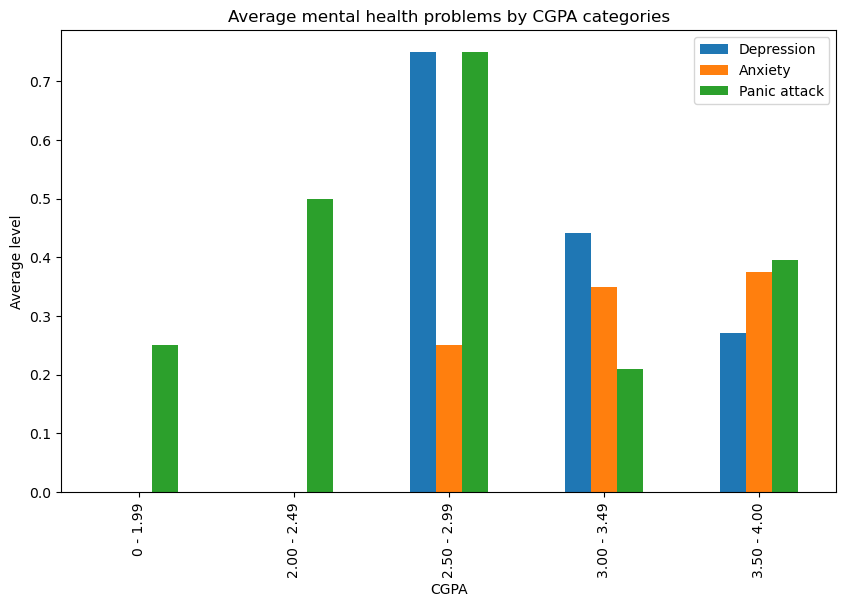

In [36]:
groupedGPA.plot(kind='bar',
                figsize=(10, 6),
                title='Average mental health problems by CGPA categories',
                xlabel='CGPA',
                ylabel='Average level')

### Dependence of marriage status on mental problems

<Axes: title={'center': 'Average of mental health problems by marriage status'}, xlabel='Marriage status', ylabel='Average level'>

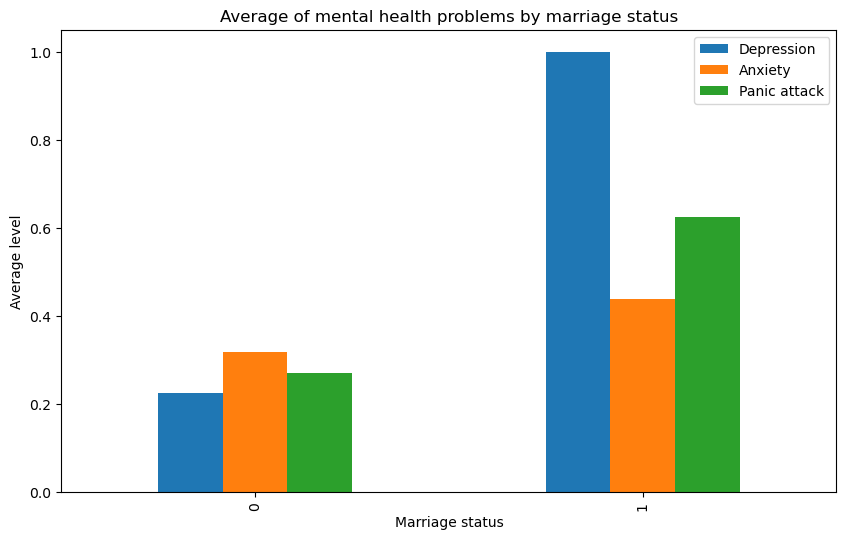

In [37]:
groupedMarital = df.groupby(['Marital status'])[['Depression','Anxiety','Panic attack']].mean()
groupedMarital.plot(kind='bar',
                    figsize=(10, 6),
                    title = 'Average of mental health problems by marriage status',
                    xlabel = 'Marriage status',
                    ylabel = 'Average level')


### T-test for dependence of presence of mental health problems by marriage status

***A t-test is a statistical test used to compare the means of two groups and determine whether the difference between them is statistically significant. It helps answer the question: Is the difference between these groups real, or could it have happened by chance?***

* t-statistic: This is the value calculated by the t-test. It represents the size of the difference relative to the variation in the data. A higher t-statistic generally means a bigger difference between the groups.
* p-value: This tells us whether the difference between the groups is statistically significant. A smaller p-value (typically less than 0.05) means there is strong evidence that the difference is real and not due to random chance.

In [38]:
married = df[df['Marital status'] == 1]
not_married = df[df['Marital status'] == 0]
for d in ['Depression','Panic attack','Anxiety']:
    t_stat,p_value = ttest_ind(married[d],not_married[d],equal_var=False)
    print(f'T test for {d}: t_stat = {t_stat:.3f}',f'p_value = {p_value:.3f}',sep = '\n\n')

T test for Depression: t_stat = 17.082

p_value = 0.000
T test for Panic attack: t_stat = 2.643

p_value = 0.016
T test for Anxiety: t_stat = 0.870

p_value = 0.395


C:\Users\ystfn\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


*All p-values <u>except Anxiety</u> are less then 0.05, so there is a real difference*

### Dependence of CGPA AND marriage status on mental problems

<Axes: title={'center': 'Average of mental problems by CGPA and Marital status'}, xlabel='CGPA,Marital status'>

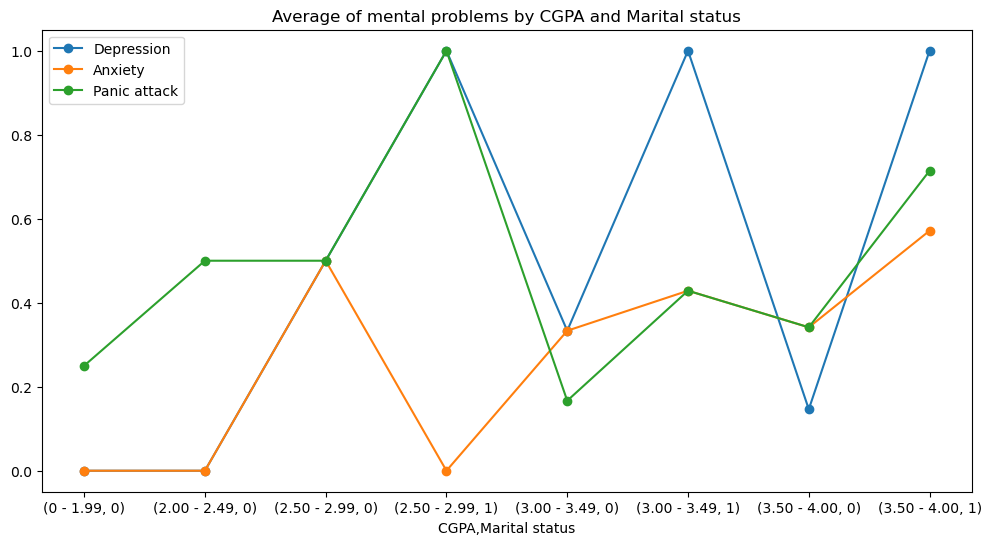

In [39]:
groupedALL = df.groupby(['CGPA','Marital status'])[['Depression','Anxiety','Panic attack']].mean()
groupedALL.plot(kind='line', figsize=(12,6), marker='o', title="Average of mental problems by CGPA and Marital status")


## Mental problems and asking for help by genders

### Mental problems by genders

In [40]:
gen_ill = df.groupby(['Gender'])[['Depression','Anxiety','Panic attack']].sum()

<Axes: xlabel='Gender'>

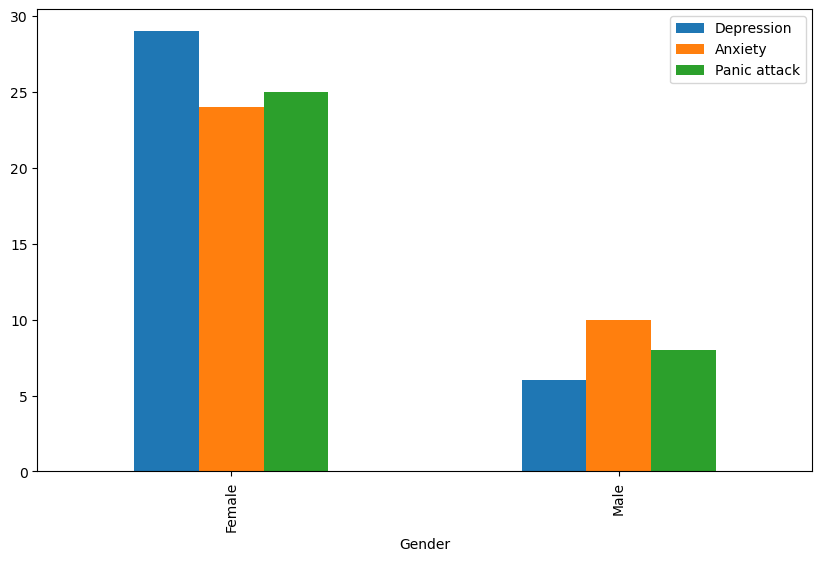

In [41]:
gen_ill.plot(kind = 'bar',figsize = (10,6),)

### Asking for treatment by genders

In [42]:
gen_help = df.groupby(['Gender'])[['Help']].sum()

<Axes: xlabel='Gender'>

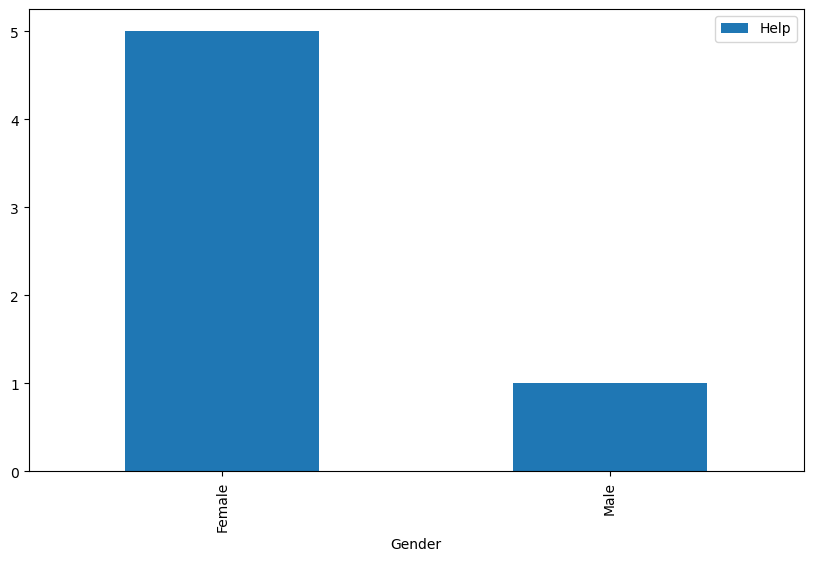

In [43]:
gen_help.plot(kind = 'bar',figsize = (10,6),)

### Percentage of people, who have mental problems and asking for treatment

In [44]:
t = gen_ill.join(gen_help, how = 'outer')

In [45]:
depression = t['Help'] / t[['Depression']].sum(axis=1) * 100
depression

Gender
Female    17.241379
Male      16.666667
dtype: float64

<Axes: title={'center': 'Percentage of people, who have depression and asking for treatment by genders'}, xlabel='Gender'>

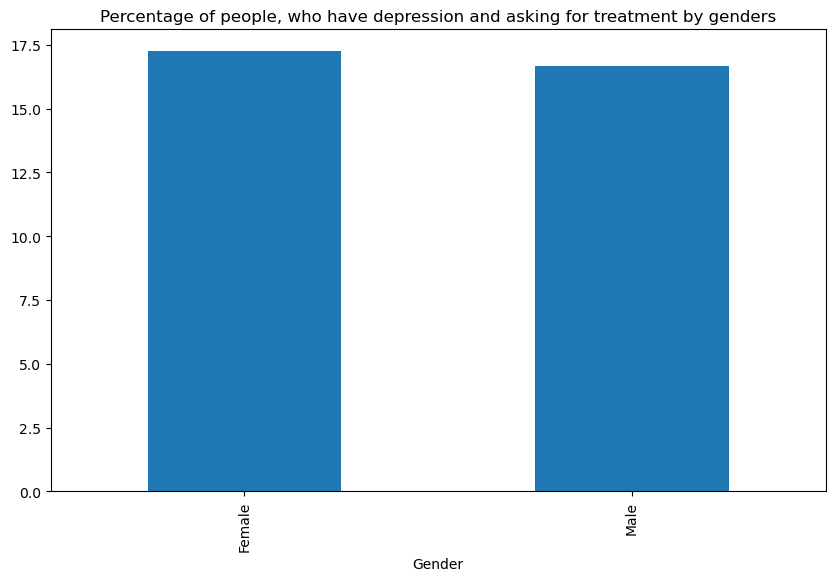

In [46]:
depression.plot(kind = 'bar',figsize = (10,6),title = 'Percentage of people, who have depression and asking for treatment by genders')

In [47]:
anxiety = t['Help'] / t[['Anxiety']].sum(axis=1) * 100
anxiety

Gender
Female    20.833333
Male      10.000000
dtype: float64

<Axes: title={'center': 'Percentage of people, who have anxiety and asking for treatment by genders'}, xlabel='Gender'>

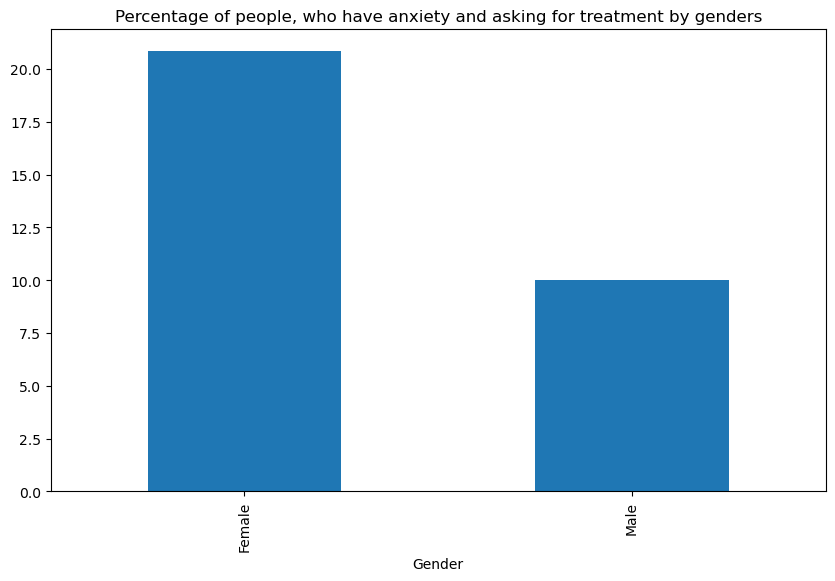

In [48]:
anxiety.plot(kind = 'bar',figsize = (10,6),title = 'Percentage of people, who have anxiety and asking for treatment by genders')

In [58]:
panic_attack= t['Help'] / t[['Panic attack']].sum(axis=1) * 100
panic_attack

Gender
Female    20.0
Male      12.5
dtype: float64

<Axes: title={'center': 'Percentage of people, who have panic attacks and asking for treatment by genders'}, xlabel='Gender'>

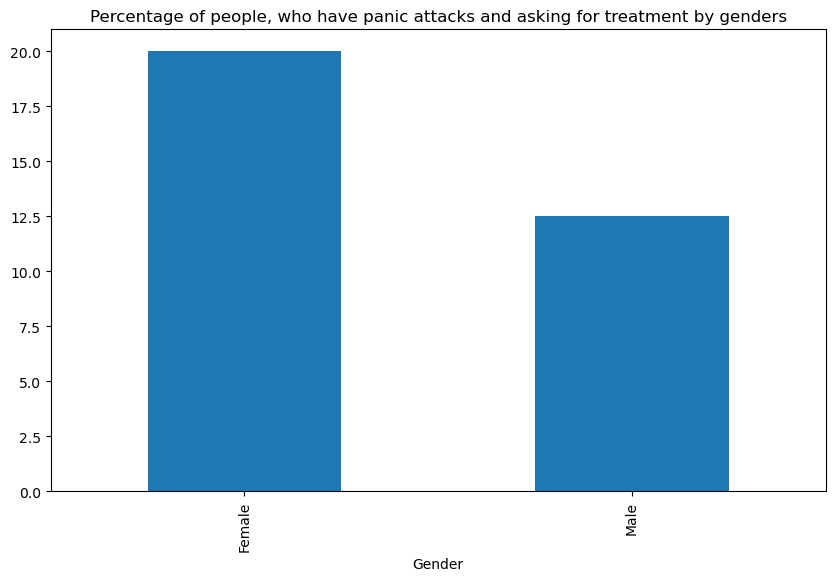

In [59]:
panic_attack.plot(kind = 'bar',figsize = (10,6),title = 'Percentage of people, who have panic attacks and asking for treatment by genders')

In [60]:
all = t['Help'] / t[['Depression','Anxiety','Panic attack']].sum(axis=1) * 100
all

Gender
Female    6.410256
Male      4.166667
dtype: float64

<Axes: title={'center': 'Percentage of people, who have all problems and asking for treatment by genders'}, xlabel='Gender'>

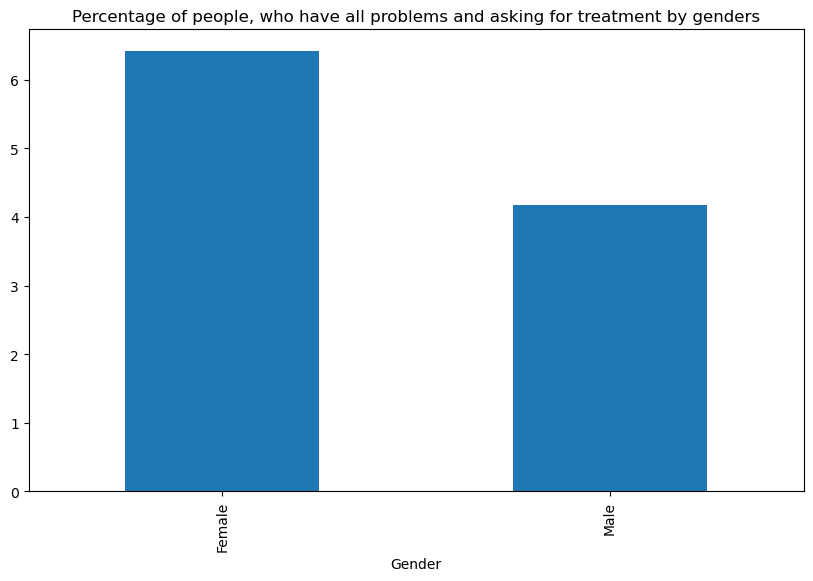

In [61]:
all.plot(kind = 'bar',figsize = (10,6),title = 'Percentage of people, who have all problems and asking for treatment by genders')